In [0]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,7)
import seaborn as sns
from datetime import datetime, timedelta,date
import requests 
from itertools import product
import warnings
warnings.filterwarnings('ignore')

In [0]:
ccoinbase=['BTC','XRP', 'RON', 'ETH', 'BCH', 'BSV', 'CRO', 'INB', 'USDT','LTC','XTZ','XMR','DASH','ZEC','MKR']

In [0]:
def get_data(coin):
  url='https://min-api.cryptocompare.com/data/v2/histohour?fsym='+coin+'&tsym=USD&limit=2000&extraParamsapi_key={*****************}'
  f = requests.get(url)
  ipdata = f.json()
  ipdata=ipdata['Data']['Data']
  hist_df=pd.DataFrame(ipdata)
  hist_df['time'] = pd.to_datetime(hist_df['time'], unit='s')
  hist_df.index = hist_df['time']
  hist_df['%diff']=((hist_df['close']-hist_df['open'])/hist_df['open'])*100
  hist_df['diffhl']=((hist_df['high']-hist_df['low'])/hist_df['low'])*100
  hist_df['diffvol']=((hist_df['volumeto']-hist_df['volumefrom'])/hist_df['volumefrom'])*100
  hist_df['rol_mean_24H']=hist_df['close'].rolling(24).mean()
  hist_df['from_mean_24H']=hist_df['close']-hist_df['rol_mean_24H']
  hist_df.loc[hist_df['%diff']<=0,'diffclose']=-1
  hist_df.loc[hist_df['%diff']>0,'diffclose']=1
  #hist_df.loc[hist_df['%diff']>3,'diffclose']=1
  hist_df['diffrol_mean_24H']=hist_df['rol_mean_24H']-hist_df['rol_mean_24H'].shift(1)
  hist_df.loc[hist_df['diffrol_mean_24H']<0,'diffrol_mean_24H']=-1\
  hist_df.loc[hist_df['diffrol_mean_24H']>0,'diffrol_mean_24H']=1
  hist_df.loc[hist_df['diffrol_mean_24H']==0,'diffrol_mean_24H']=0
  del hist_df['time']
  del hist_df['conversionType']
  del hist_df['conversionSymbol']
  for c in hist_df.columns:
    hist_df.rename(columns={c: c+coin},inplace=True)
  return(hist_df)


In [0]:
data=get_data('EOS')

In [0]:
for coin in ccoinbase:
    data2=get_data(coin)
    data=data.merge(data2, left_index=True,right_index=True)

In [0]:
data['diffcloseBTC'].value_counts()

 1.0    1017
-1.0     984
Name: diffcloseBTC, dtype: int64

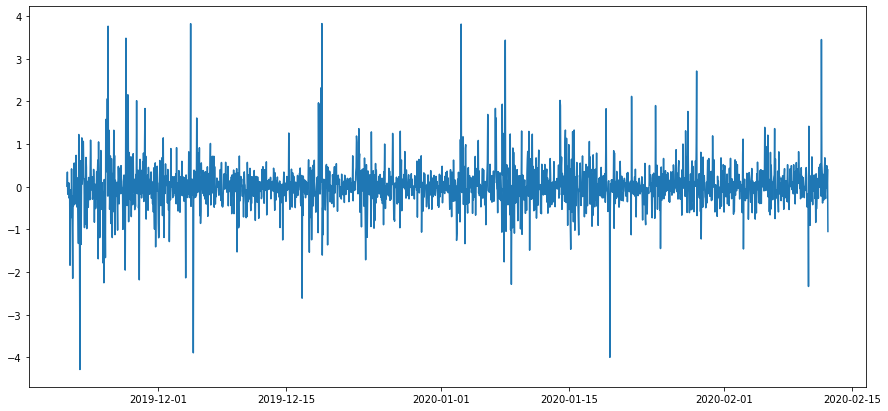

In [0]:
plt.plot(data['%diffBTC'])

In [0]:
full_csv= data.to_csv (r'C:\Users........fullcsv.csv', index = True, header=True)
full_xls= data.to_excel (r'C:\Users.......fullxls.xlsx', index = True, header=True) 